 <br> <font color = black size=8>CQF Lecture One - Exercises </font> 

**The log-Normal random walk**.

$$ dS = \mu S dt + \sigma S dX$$

In class we have looked at Stochastic Differential Equation (SDE) as a popular model for stock price S. 

On the dataset of prices from the Lecture Excel file - or any equity index of your own choice, we test the robustness of the assumption that 

$$ R_i = [\mu\delta t + \sigma\sqrt{\delta t}\phi_i] $$ 

if the drift is a negligible, very small and non robust quantity, $\mu\delta t  \approx 0$.

$$ R_i = \sigma\sqrt{\delta t}\phi_i.$$

$R_i$ represents the returns over timestep $\delta t$, the $\phi_i$ ~ $N(0,1)$ is Standard Normal variable. The tasks below give sufficient detail to be performed on your own - the solution give more information but no separate computation provided.

1. Scaling of $\sigma$ with time, to the size of $\delta t$: compute column(s) of returns (1D, 2D OR 5D but no longer). For example, 5D will be $R_i = \frac{S_{t+5} - S_t}{S_t}$. For each, compute the standard deviation of the role column. Adjust $\sigma_{2D}$ by $1/\sqrt{2}$ and $\sigma_{5D}$ by $1/\sqrt{5}$ - are these comparable to $\sigma_{1D}$?


In [1]:
# Loading packages
import pandas as pd
import numpy as np

# Importing data and calculating return 1D, 2D and 5D
sp500 = pd.read_csv("01-The_Random_Behaviour_of_Assets-SPX.csv")
sp500_returns = pd.DataFrame()
sp500_returns[["1D"]] = np.log(sp500[["Adj Close"]]).diff().fillna(0)
sp500_returns[["2D"]] = np.log(sp500[["Adj Close"]]).diff(2).fillna(0)
sp500_returns[["5D"]] = np.log(sp500[["Adj Close"]]).diff(5).fillna(0)

# Calculating scaled standard deviation
sigma_1D = np.std(sp500_returns[["1D"]])
sigma_2D = np.std(sp500_returns[["2D"]]).divide(np.sqrt(2))
sigma_5D = np.std(sp500_returns[["5D"]]).divide(np.sqrt(5))

print("Standard deviation for 1D return:\n{}".format(sigma_1D))
print("Standard deviation for 2D return:\n{}".format(sigma_2D))
print("Standard deviation for 5D return:\n{}".format(sigma_5D))

Standard deviation for 1D return:
1D    0.01201
dtype: float64
Standard deviation for 2D return:
2D    0.011936
dtype: float64
Standard deviation for 5D return:
5D    0.01178
dtype: float64


2. Re-shuffle the dataset into two non-chronological halves (even / odd observations) and compute $\mu$, $\sigma$  separately for each half (1D returns only). Compare.

In [2]:
# Re-shuffling dataset
shuffled_sp500_returns = sp500_returns[["1D"]].sample(frac=1, random_state=53)
even_half = shuffled_sp500_returns.iloc[::2]
odd_half = shuffled_sp500_returns.iloc[1::2]

# Computing mean and standard deviation separately for each half
mean_even = even_half.mean()
mean_odd = odd_half.mean()
std_even = even_half.std()
std_odd = odd_half.std()

print("Mean for even observations:\n{}".format(mean_even))
print("Mean for odd observations:\n{}".format(mean_odd))
print("Standard deviation for even observations:\n{}".format(std_even))
print("Standard deviation for odd observations:\n{}".format(std_odd))


Mean for even observations:
1D    0.000312
dtype: float64
Mean for odd observations:
1D    0.000145
dtype: float64
Standard deviation for even observations:
1D    0.012167
dtype: float64
Standard deviation for odd observations:
1D    0.011851
dtype: float64


3. Construct Quantile-Quantile plots for 1D and 5D returns. The Q-Q plot assumes Normal distribution on horizontal axis – the better the fit between of the empirical returns to Normal distribution, the more observations will be on the diagonal line.

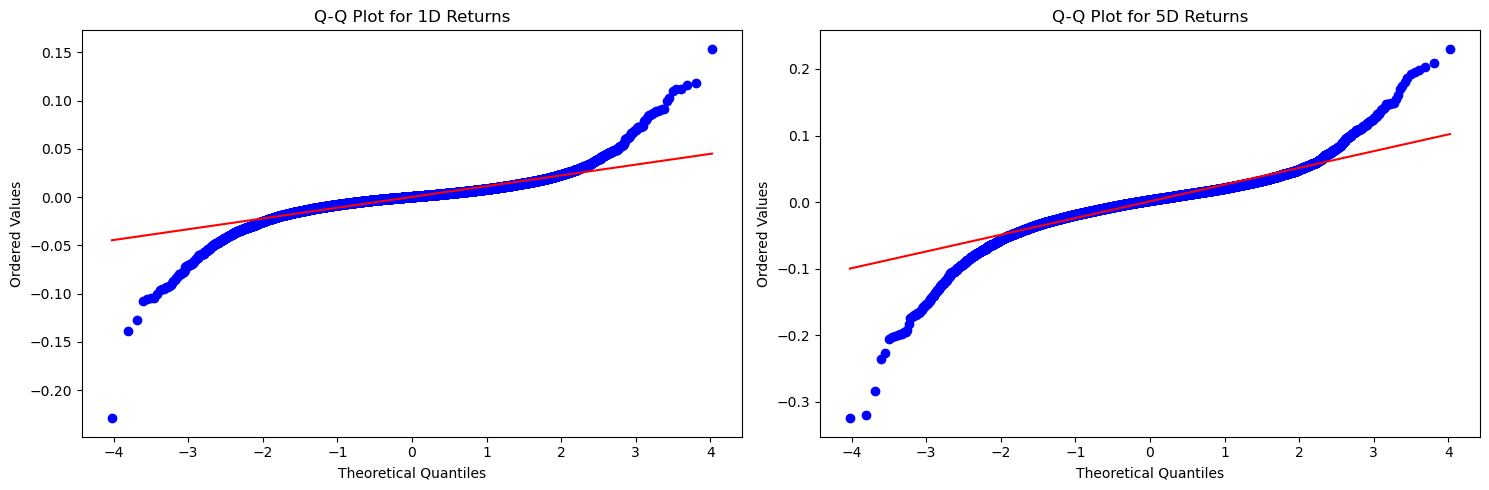

In [3]:
# Loading packages
import matplotlib.pyplot as plt
from scipy import stats

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Constructing Q-Q plot for 1D returns
res_1D = stats.probplot(sp500_returns["1D"], dist="norm", plot=axs[0])
axs[0].set_title("Q-Q Plot for 1D Returns")
axs[0].set_xlabel("Theoretical Quantiles")
axs[0].set_ylabel("Ordered Values")

# Constructing Q-Q plot for 5D returns
res_5D = stats.probplot(sp500_returns["5D"], dist="norm", plot=axs[1])
axs[1].set_title("Q-Q Plot for 5D Returns")
axs[1].set_xlabel("Theoretical Quantiles")
axs[1].set_ylabel("Ordered Values")

# Adjust spacing between subplots
plt.tight_layout()

# Show the side-by-side Q-Q plots
plt.show()


4. Construct a histogram over historical returns scaled to z-scores and compare to Normal distribution density. 

    $$ R_i = \frac{\delta S}{S} = \frac{S_{t+1} - S_t}{S_t} = \frac{S_{t+1}}{S_t} - 1 $$ 
    
    This last point is  implemented in Modeling Returns python lab (or alike content). 


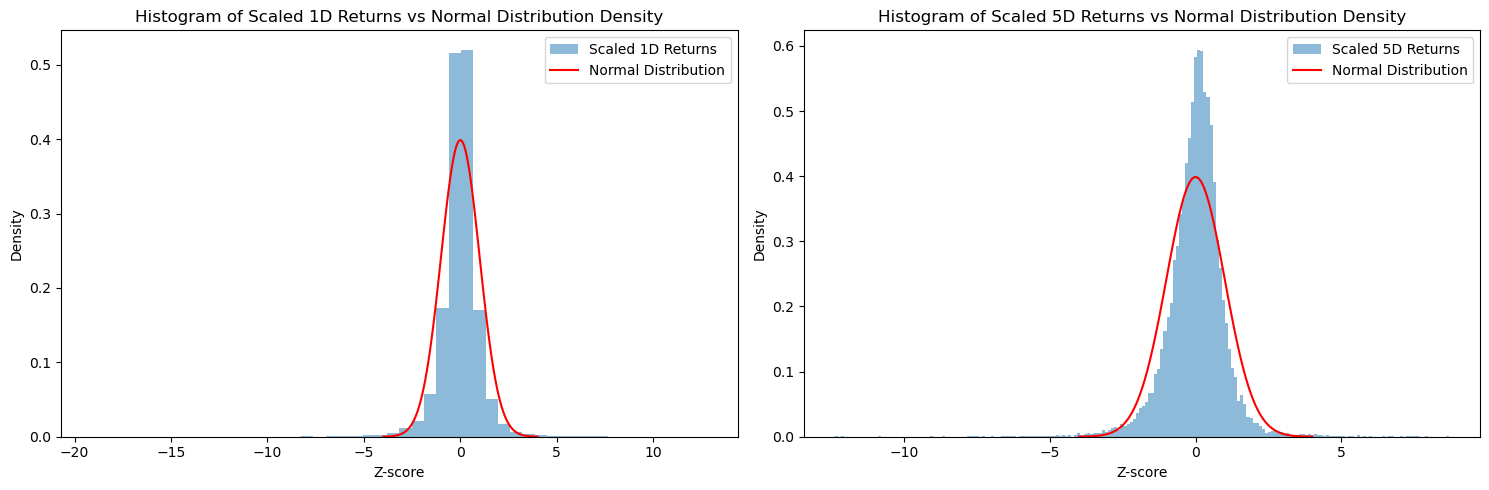

In [4]:
# Calculating mean and standard deviation
mean_1D = np.mean(sp500_returns["1D"])
mean_5D = np.mean(sp500_returns["5D"])

sigma_1D = np.std(sp500_returns["1D"])
sigma_5D = np.std(sp500_returns["5D"])

# Scale historical returns to z-scores
z_scores_1D = (sp500_returns["1D"] - mean_1D) / sigma_1D
z_scores_5D = (sp500_returns["5D"] - mean_5D) / sigma_5D

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plotting histogram of scaled 1D returns
axs[0].hist(z_scores_1D, bins=50, density=True, alpha=0.5, label="Scaled 1D Returns")

# Plotting Normal distribution density
x = np.linspace(-4, 4, 100)
y = stats.norm.pdf(x, 0, 1)
axs[0].plot(x, y, color="red", label="Normal Distribution")

axs[0].set_title("Histogram of Scaled 1D Returns vs Normal Distribution Density")
axs[0].set_xlabel("Z-score")
axs[0].set_ylabel("Density")
axs[0].legend()

# Plotting histogram of scaled 5D returns
axs[1].hist(z_scores_5D, bins=200, density=True, alpha=0.5, label="Scaled 5D Returns")

# Plotting Normal distribution density
x = np.linspace(-4, 4, 100)
y = stats.norm.pdf(x, 0, 1)
axs[1].plot(x, y, color="red", label="Normal Distribution")

axs[1].set_title("Histogram of Scaled 5D Returns vs Normal Distribution Density")
axs[1].set_xlabel("Z-score")
axs[1].set_ylabel("Density")
axs[1].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the side-by-side plot
plt.show()


**The Q-Q plot.**

The plot is straightforward to build from the first principles in Excel, Python. There are ready functions, that can go as advanced as qqplot from [statsmodels.api](https://www.statsmodels.org/stable/api.html) library in Python. However, going through the principles below you will gain further understanding of what the Q-Q plots signals.

Organize the data in columns that match Historic, Scaled and Standard returns. Historic stands for the actual or empirical S&P 500 return (our data and historic period, you can use any equity index). Scaled is the normalized return (also called z-score).

Standard refers the Normal Percentile that corresponds to the cumulative probability given by $i/N_{obs}$. It the value on axis $X$ that cuts the requisite probability under the bell of Normal density *pdf* or the axis $Y$ result of Normal cumulative density *cdf*.

| Historic  | Scaled    | i | i/N   | Standard |
|-----------|-----------|---|-------|----------|
| -0.22900  | -21.20462 | 1 | 0.00009 | -3.74534 |
| -0.09470  | -8.78146  | 2 | 0.00018 | -3.56758 |
| -0.09354  | -8.67429  | 3 | 0.00027 | -3.45987 |
| -0.09219  | -8.54970  | 4 | 0.00036 | -3.38162 |
| -0.08642  | -8.01584  | 5 | 0.00045 | -3.31983 |
| -0.07922  | -7.35036  | 6 | 0.00054 | -3.26858 |
| .         | .         | . | .     | .        |
| Table 1: Inputs for a Q-Q plot. |


1. Scale historic log-returns $R_t$ to $Z_t = \frac{r_t - \mu}{\sigma}$. Why we use log and not simple returns here is explained in Solutions. Notice our original SDE is continuous-time model.

Multi-period projection with simple returns vs. log-returns, for the asset price $S_t$

$$ R^{S}_{t} = \frac{S_{t+1}}{S_t} - 1 \quad \text{vs.} \quad R^{C}_{t} = \ln \left( \frac{S_{t+1}}{S_t} \right) $$

the conversion rule is below,

$$ R^{S}_{t} = \exp (R^{C}_{t}) - 1 $$

and can be modified to per period rate in the exponent $ r \times n$, for example, monthly rate annualized as $R^{C}_{1M} \times 12$.

We ignore the difference between simples returns vs. log-returns computed from daily closing prices, because one day is sufficiently 'small time' period. The numerical difference is rarely in 2nd digit after the dot as a percentage, mostly 3rd or higher. However, remember that typical Monte-Carlo simulation step $dt=0.01$ is $\tau=2.52$ working days, which is considerably longer than one day. 

**For log-returns (compound rates) and SDE simulation.**,
A $\tau$-period-log return is simply the sum of the single-period log-returns over $\tau/n$ periods, because it is additive in the exponent:

$$ R_{t + \tau} = R_t + R_{t + 1} + R_{t + 2} + \ldots + R_{t + n - 1} $$

$$ R_{1Y} = R_{1M} + R_{2M} +  \ldots + R_{12M} $$

where $R_{1M}$ is monthly return for $[0, 1M]$, $R_{2M}$ is monthly return for $[1M, 2M]$ and so on to $R_{12M}$ monthly return for $[11M, 12M]$.

**For linear (simple) returns and portfolio optimization and simple interest rates,** projecting from single periods over the longer time period involves multiplication as follows:

$$ 1 + R_{t + \tau} = (1 + R_{t}) \times (1 + R_{t+1}) \times \ldots \times (1 + R_{t+n-1}) $$

$$ 1 + R_{1Y} = (1 + R_{1M}) \times (1 + R_{2m}) \times \ldots \times (1 + R_{12M}) $$

$$ 1 + r_{1Y} = (1 + r_{1M}) \times (1 + f_{2M}) \times \ldots \times (1 + f_{12M}) $$

The projection rule here is equivalent to no arbitrage relationship between: a set of forward rates and the simple (spot) rate over the entire period.

$r_{1M}\equiv f_{1M}$ applies over $[0, 1M]$ while $f_{12M}$ is a *forward term rate* applied to the period $[11M, 12M]$ and preferably known at the start of the period. That applies in interest rates payoffs and became a non-trivial assumption in the post-LIBOR world of backward-looking rates, computed from historic transactions only.

**Rules about asset returns in portfolio optimization problems.** Returns are not unitless { their implicit unit is time. Returns are always estimated over some timescale, most common is 'daily timescale' where for $R_{t+\tau} - R_t$ the $\tau = 1/252 \approx 0.004$. 

The square-root volatility time-scaling $\sigma\sqrt{\delta t}$ applies under the assumption that compound returns are invariants - they behave identically and independently across time. Markowitz mean- variance minimisation (MVP) objective function is defined for linear returns.

$$ \text{argmin}_w {w'\mu_{\tau} - \lambda w' \Sigma_t w}$$

where subscript in $\mu_t$ and $\Sigma_{\tau}$ means their estimation from market data of respective frequency, eg daily $\tau = 1/252$.

In portfolio optimization, linear returns typically aggregated across assets, and not time. Return for a portfolio of N assets is a weighted average of individual asset returns,

$$ R_{t}^{'} = w_1R_{t,1} + w_2 R_{t,2} + w_3 R_{t,3} + \ldots + w_N R_{t,N}. $$


2.  Sort the scaled returns in the ascending order and create an index column $i = 1, ..., N$.

3. The cumulative density – percentage of observations below this – will be simply $i/N$.

**Back to a histogram** as a discrete representation of probability density function $f_X(x)$, a pdf for the random variable capital X and its specific values small x. To build a histogram one engages in estimation of density,

$$ f_X(x) = \frac{1}{(N h)}n_j $$

where $n_j$ is the varying number of observations in a bucket, $h$ is our bandwidth - bucket/window size on the scale of real numbers $R\mathbb{$}$, and $N$ is the sample size. 

$n_j=N$ gives frequency, while $n_j=N h$ is 'a chunk' of density also called probability mass. If we set the window size so small that it includes only one observation, then for each chunk the pdf is $f(x) = 1/Nh$, where $1/h$ is a normalizing parameter.

With the proper 'kernel smoothing' methods, small bandwidth setting $h$ will produce a histogram that repeats the plotted data (low smoothness), while sufficiently high bandwidth will smooth the representation into a symmetric histogram as if the returns are Normally distributed.

It is recommended that you experiment by setting the number of breakpoints higher (gives low smoothness) and lower but not too low.

4. The standardised percentile is obtained with the inverse Normal CDF $\Phi^{-1}(i/N)$. Each observation adds’ density (probability mass) of $1/N$.

Q-Q plot is straightforward to build from the first principles: follow the transformations and arrange the data in matching columns. Implementing the steps, you will obtain a result alike the following table. 'Historic' stands for the actual S&P 500 return, matched by 'Scaled' return (Z-score), indexes and the Standard Normal Percentile which corresponds to the cumulative probability given by $i=N$. Notice one past negative return that was in excess of 21 standard deviations!

Table 1: Left: Inputs for a Q-Q plot                    | Right: Empirical PDF and CDF

| Historic Scaled i | i=N        | Standard |  |  | PDF   | 1=N        | CDF      | i=N      |
|-------------------|------------|----------|--|--|-------|------------|----------|----------|
|-0.22900          |-21.20462   | 1        |   | |0.00009|0.00009     |0.00009   |0.00009   |
|-0.09470          |-8.78146    | 2        |   | |0.00009|0.00018     |0.00009   |0.00018   |
|-0.09354          |-8.67429    | 3        |   | |0.00009|0.00027     |0.00009   |0.00027   |
|-0.09219          |-8.54970    | 4        |   | |0.00009|0.00036     |0.00009   |0.00036   |
|-0.08642          |-8.01584    | 5        |   | |0.00009|0.00045     |0.00009   |0.00045   |
|-0.07922          |-7.35036    | 6        |   | |0.00009|0.00054     |0.00009   |0.00054   |
|. . .             |. . .       |. . .     |   | | . . . | . . .      | . . .    |. . .     |


**Q-Q Plot step-by-step**

(a) Scale empirical log-returns $r_t$ to be the Normal variables $Z_t=\frac{r_t - \mu}{\sigma}$. For a market
index the average daily return $\mu\approx 0$, that is increasingly valid for a large sample.

(b) Sort the scaled returns in the ascending order and create an index column $i=1..N$.

(c) For each observation, the individual probability density (probability mass) is $1/N$ and the cumulative density (percentage of observations below this) is $i/N$. 

(d) The standardized percentile is obtained with the inverse Normal CDF $\Phi^{-1}(i/N)$. 

Because of our indexing $i = 1::N_{obs}$, the percentile axe $X$ is essentially a scale of Standard Normal variables. For example, the standard normal variable (Z-score) 1:645 corresponds to an observation below which 95% of the observations reside.

Plot the scaled returns (Z-scores) from Step 1 against the Normal percentiles from Step 4. For the perfectly Normal log-returns the Q-Q plot would be a straight line.